# Senetence Analysis using CNN

### Import Libraries

In [23]:
!pip install -q gradio

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, Conv1D, GlobalMaxPooling1D
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Step 1: Data Loading
### Load dataset

In [10]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/amazon_cells_labelled.txt", names=['sentence', 'label'], sep='\t')

In [11]:
df.head()

,sentence,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


### Visualize data

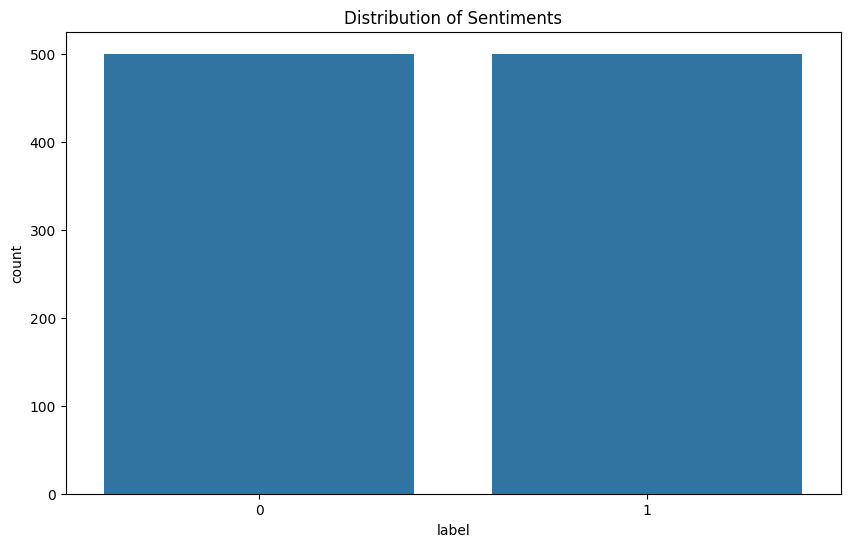

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=df)
plt.title('Distribution of Sentiments')
plt.show()

## Step 2: Data preprocessing
### Split the data into training and testing sets

In [13]:
X = df['sentence'].values
y = df['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Tokenize the text

In [14]:
max_words = 1000
max_len = 150
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

### Pad sequences

In [15]:
X_train_seq = pad_sequences(X_train_seq, maxlen=max_len)
X_test_seq = pad_sequences(X_test_seq, maxlen=max_len)

## Step 3: Build the CNN model

In [16]:
model = Sequential()
model.add(Embedding(max_words, 50, input_length=max_len))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Step 4: Train the model

In [17]:
callbacks = [EarlyStopping(monitor='val_loss', patience=2)]
history = model.fit(X_train_seq, y_train, epochs=10, validation_split=0.2, callbacks=callbacks)

Epoch 1/10
20/20 [==============================] - 4s 97ms/step - loss: 0.6915 - accuracy: 0.5094 - val_loss: 0.6853 - val_accuracy: 0.5437
Epoch 2/10
20/20 [==============================] - 1s 57ms/step - loss: 0.6625 - accuracy: 0.7437 - val_loss: 0.6682 - val_accuracy: 0.7188
Epoch 3/10
20/20 [==============================] - 2s 126ms/step - loss: 0.6099 - accuracy: 0.8594 - val_loss: 0.6176 - val_accuracy: 0.7688
Epoch 4/10
20/20 [==============================] - 4s 173ms/step - loss: 0.4942 - accuracy: 0.9094 - val_loss: 0.5272 - val_accuracy: 0.7875
Epoch 5/10
20/20 [==============================] - 4s 187ms/step - loss: 0.3279 - accuracy: 0.9328 - val_loss: 0.4387 - val_accuracy: 0.8062
Epoch 6/10
20/20 [==============================] - 2s 89ms/step - loss: 0.1980 - accuracy: 0.9547 - val_loss: 0.3975 - val_accuracy: 0.8250
Epoch 7/10
20/20 [==============================] - 2s 79ms/step - loss: 0.1187 - accuracy: 0.9828 - val_loss: 0.3919 - val_accuracy: 0.8375
Epoch 8/10

## Step 5: Evaluate the model

In [18]:
loss, accuracy = model.evaluate(X_test_seq, y_test)
print(f'Accuracy: {accuracy}')

7/7 [==============================] - 0s 8ms/step - loss: 0.4282 - accuracy: 0.8250
Accuracy: 0.824999988079071


### Visualize model performance

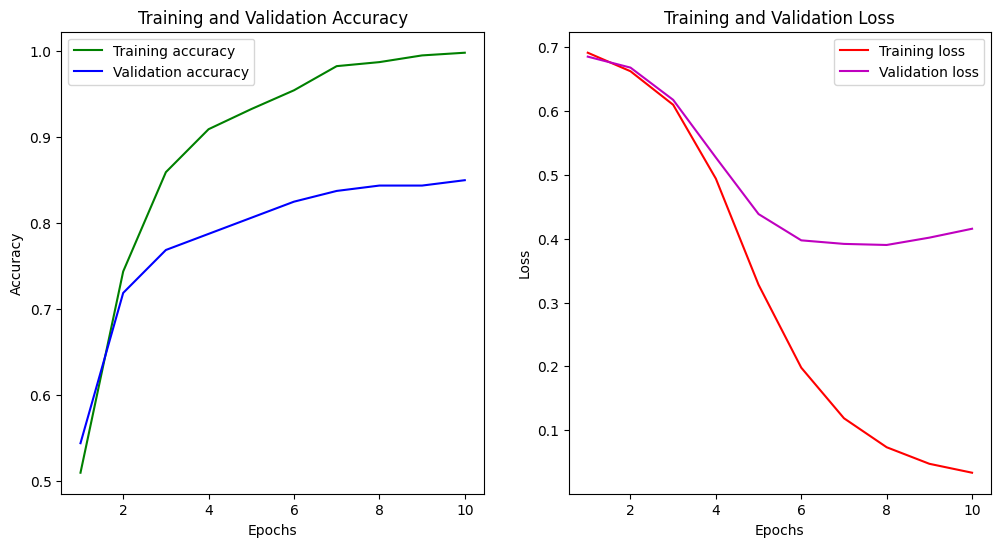

In [19]:
epochs = range(1, len(history.history['accuracy']) + 1)
plt.figure(figsize=(12, 6))

# Plotting accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['accuracy'], 'g', label='Training accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['loss'], 'r', label='Training loss')
plt.plot(epochs, history.history['val_loss'], 'm', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Step 6: Use the model to classify text

In [20]:

def classify_text(text):
    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=max_len)
    pred = model.predict(padded)
    return 'Positive' if pred > 0.5 else 'Negative'

In [22]:
import gradio as gr

demo = gr.Interface(fn=classify_text, inputs="text", outputs="label")
demo.launch()

ImportError: cannot import name 'TypeAliasType' from 'typing_extensions' (/usr/local/lib/python3.10/dist-packages/typing_extensions.py)